In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
#import dataset
df = pd.read_csv('diabetes.csv')

# Encode Smoking_history variable
df['smoking_history'] = df['smoking_history'].replace('never', 1)
df['smoking_history'] = df['smoking_history'].replace('not current', 2)
df['smoking_history'] = df['smoking_history'].replace('former', 3)
df['smoking_history'] = df['smoking_history'].replace('current',4)
df['smoking_history'] = df['smoking_history'].replace('ever', 5)
df['smoking_history'] = df['smoking_history'].replace('No Info', 6)

# one-hot encode gender
gender = 'gender'
df[gender] = df[gender].replace('Male', 0)
df[gender] = df[gender].replace('Female', 1)
df[gender] = df[gender].replace('Other', 2)

df.head(10)

/var/folders/nj/kzsyvyz11z19qdb306ljw8_m0000gn/T/ipykernel_91526/3297304010.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoking_history'] = df['smoking_history'].replace('No Info', 6)
/var/folders/nj/kzsyvyz11z19qdb306ljw8_m0000gn/T/ipykernel_91526/3297304010.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[gender] = df[gender].replace('Other', 2)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,1,25.19,6.6,140,0
1,1,54.0,0,0,6,27.32,6.6,80,0
2,0,28.0,0,0,1,27.32,5.7,158,0
3,1,36.0,0,0,4,23.45,5.0,155,0
4,0,76.0,1,1,4,20.14,4.8,155,0
5,1,20.0,0,0,1,27.32,6.6,85,0
6,1,44.0,0,0,1,19.31,6.5,200,1
7,1,79.0,0,0,6,23.86,5.7,85,0
8,0,42.0,0,0,1,33.64,4.8,145,0
9,1,32.0,0,0,1,27.32,5.0,100,0


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
X = df.drop("diabetes", axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# random forest

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5, 70, 5),
    'n_estimators': range(1, 100, 10)
}

random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)

grid_search_rf = GridSearchCV(random_forest, 
                              param_grid=param_grid, 
                              cv=3,
                              scoring='recall',
                              return_train_score=True)
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

/Users/tiffanylin/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'max_depth': 30, 'n_estimators': 1}

In [10]:
rfc = RandomForestClassifier(n_estimators=1, max_depth=30, random_state=42)
# Train Random Forest Classifer
rfc.fit(X_train, y_train)
#Predict the response for test dataset
pred = rfc.predict(X_test)
#Evaluation using Classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18295
           1       0.71      0.72      0.71      1705

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000

[[17791   504]
 [  481  1224]]


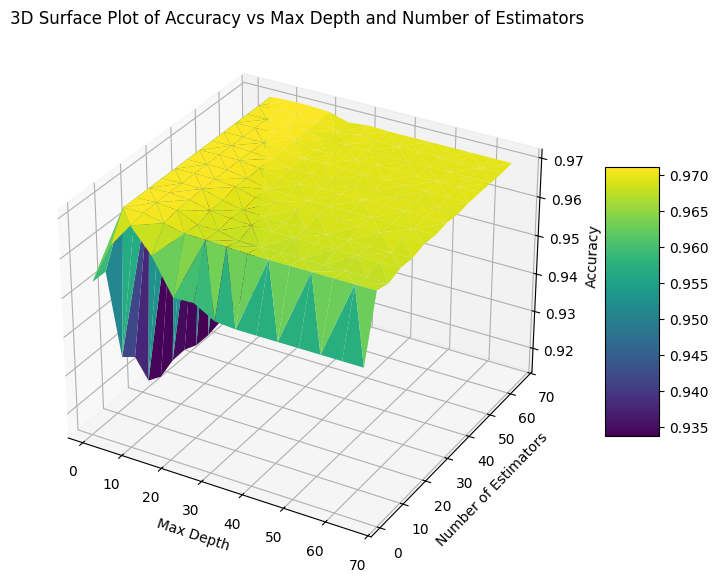

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define ranges of max_depth and n_estimators
max_depths = range(1, 70, 5)
n_estimators = range(1, 70, 5)

# Initialize lists to store results
accuracy_results = []

# Perform grid search manually
for max_depth in max_depths:
    for n_est in n_estimators:
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_est, random_state=42)
        model.fit(X_train, y_train)
        test_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, test_pred)
        accuracy_results.append((max_depth, n_est, accuracy))

# Convert results to numpy arrays for easier manipulation
accuracy_results = np.array(accuracy_results)
max_depths = accuracy_results[:, 0]
n_estimators = accuracy_results[:, 1]
accuracies = accuracy_results[:, 2]

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data
surf = ax.plot_trisurf(max_depths, n_estimators, accuracies, cmap='viridis', edgecolor='none')

# Add labels and title
ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Estimators')
ax.set_zlabel('Accuracy')
ax.set_title('3D Surface Plot of Accuracy vs Max Depth and Number of Estimators')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show plot
plt.show()


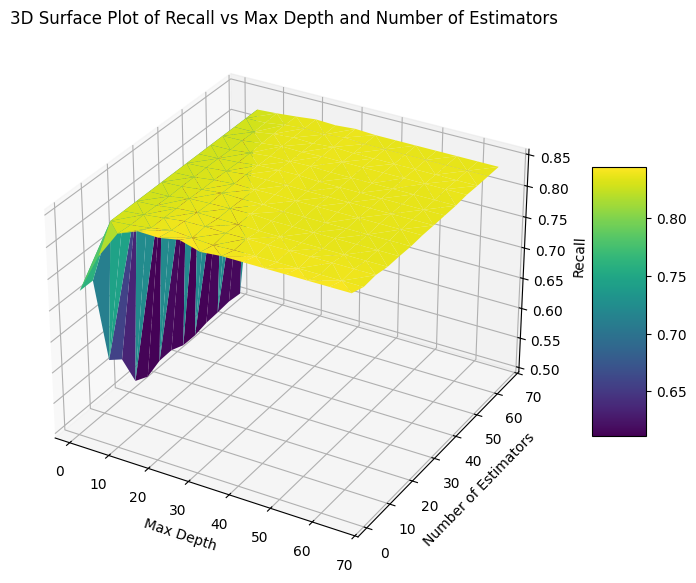

In [9]:
# Define ranges of max_depth and n_estimators
max_depths = range(1, 70, 5)
n_estimators = range(1, 70, 5)

# Initialize lists to store results for recall
recall_results = []

# Perform grid search manually for recall
for max_depth in max_depths:
    for n_est in n_estimators:
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_est, random_state=42)
        model.fit(X_train, y_train)
        test_pred = model.predict(X_test)
        recall = recall_score(y_test, test_pred, average='macro')
        recall_results.append((max_depth, n_est, recall))

# Convert results to numpy arrays for easier manipulation
recall_results = np.array(recall_results)
max_depths_recall = recall_results[:, 0]
n_estimators_recall = recall_results[:, 1]
recalls = recall_results[:, 2]

# Create 3D plot for recall
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot data for recall
surf = ax.plot_trisurf(max_depths_recall, n_estimators_recall, recalls, cmap='viridis', edgecolor='none')

# Add labels and title for recall plot
ax.set_xlabel('Max Depth')
ax.set_ylabel('Number of Estimators')
ax.set_zlabel('Recall')
ax.set_title('3D Surface Plot of Recall vs Max Depth and Number of Estimators')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Show plot
plt.show()